In [7]:
ENV["JULIA_PKG_SERVER"] = ""
using Pkg; Pkg.activate(@__DIR__)
Pkg.instantiate()

using DataFrames
using Plots
using CategoricalArrays
using Random
using MLJBase: machine, transform
using TableTransforms
using Imbalance

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


### 1. Generate Random Data

In [8]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 2
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, insert_y=y_ind, rng=39)
X, y = generate_imbalanced_data(num_rows, num_features; min_sep=0.1, class_probs, type, rng=39)

((Column1 = [0.5335717500743525, 0.8821352828197132, 0.9699278661020527, 0.9680253133975029, 1.1831710652093157, 0.9168709606882963, 0.9850319538081584, 0.8720886584226, 0.3628359664976267, 0.8910341809150393  …  0.31839810987684447, 0.7681314226442253, 0.610910182908583, 1.0197585565889629, 0.5907146520944038, 0.7753989797282248, 0.954320025483771, 0.45455318213107887, -0.047679182523858055, 0.9184736676140485], Column2 = [0.44540134242327084, 0.7571015784041509, 0.669503820982702, 0.8189533662856044, 0.5330569087992494, 0.1259322525901253, 0.7449996820795919, 0.12443854899789841, 0.270616227109835, 0.7097570399369901  …  0.2528413892321608, 0.6271245855576326, 0.5544989022636279, 1.259696096246748, 0.5637174811944009, 0.9481930865064256, 0.7203652367011733, 0.4521544044906046, 0.3916128462629468, 0.9169948827024698]), CategoricalValue{Int64, UInt32}[1, 0, 0, 0, 2, 2, 0, 0, 2, 2  …  1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

### 2. Apply ENN Undersampler

#### Using Imbalance Only

In [9]:
X_under, y_under = enn_undersample(X, y; keep_condition="all", min_ratios = 0.01, rng = 42)
checkbalance(y_under)

0: ▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇ 9 (100.0%) 


#### Using MLJ

In [10]:
naive_model = Imbalance.MLJ.ENNUndersampler(
	k = 4,
	keep_condition = "all",
	min_ratios = Dict(0 => 1.0, 1 => 1.0, 2 => 0.9),
	rng = 42,
)
mach = machine(naive_model)
X_under, y_under = transform(mach, X, y)


((Column1 = [0.5335717500743525, -0.13952101344864953, 0.42336786775798274, 0.34308403830813955, 0.035831858072481404, 0.568853362458603, 0.20982240999036814, 0.31839810987684447, 0.610910182908583, 0.5907146520944038  …  0.9168709606882963, 0.8910341809150393, 1.070108815267091, 0.5582163282425109, 0.7801806132916496, 0.7061026812838237, 1.0595169447078403, 0.7746976610879592, 0.7346710556840382, 0.9132654518856771], Column2 = [0.44540134242327084, 0.4060018414737193, 0.12846469555398526, 0.13981139091241562, 0.49577976641694593, 0.5615839170813708, 0.4690187559463904, 0.2528413892321608, 0.5544989022636279, 0.5637174811944009  …  0.1259322525901253, 0.7097570399369901, 0.4601640232179761, 0.35978903338882046, 0.8757862319820828, 0.6155487949776717, 0.7067192657618212, 0.8535026516775226, 0.7125978924046692, 0.5557467610596903]), Any[CategoricalValue{Int64, UInt32} 1, CategoricalValue{Int64, UInt32} 1, CategoricalValue{Int64, UInt32} 1, CategoricalValue{Int64, UInt32} 1, CategoricalVa

#### Using TableTransforms

In [11]:
using Imbalance: TableTransforms.ENNUndersampler
naive_model_t = ENNUndersampler(y_ind, min_ratios=Dict(0=>1.0, 1=> 0.9, 2=>1.0), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [0.16580784057970624, 0.028701533032199134, 0.4300903874757456, 0.601907033603134, 0.4635669386287692, -0.04379577568657339, 0.4537421375841526, 0.30492372751637, 0.3649603219894, 0.4419455105500204  …  0.3558076324248199, 0.3156246225302922, 0.27709268027017625, 0.8274094491950671, 1.3302348364519503, 0.8181703099806715, 0.5070976755541201, 1.1268168425289513, 0.5722723817065953, 0.3624417525580636],
 Column2 = [0.5436260540681496, 0.562322746155613, 0.5261960094798105, 0.3949483236680081, 0.5620523084143942, 0.3259753823019461, 0.6443914339553687, 0.24195007616267739, 0.5136797388115634, 0.26113184951603363  …  0.14228708362850245, 0.6044529417989928, 0.5721389799998902, 0.31721516543258044, 0.2692348698575058, 0.5166570438855185, 0.4761014027249382, -0.027056729650205502, 0.5622128924473523, 0.5588047475184628],
 Column3 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],)

### 3. Plot the Results

   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


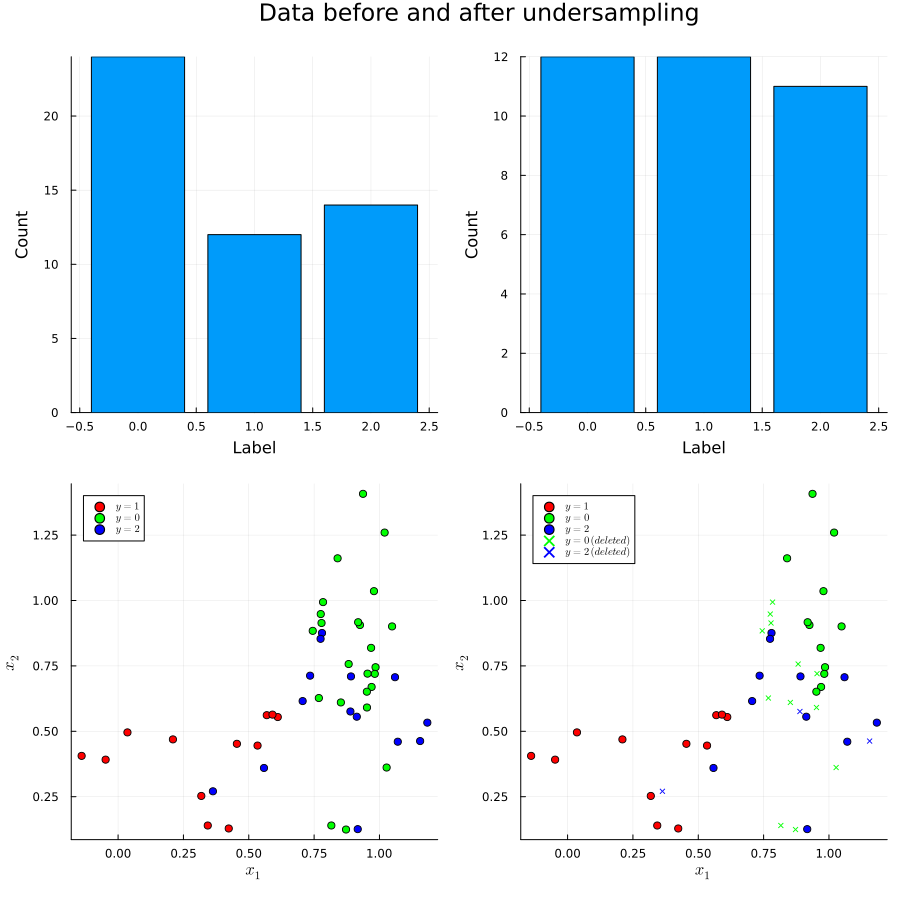

In [12]:
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, y_under, X, X_under)